<a href="https://colab.research.google.com/github/Mahziyar-Yz/sklearn_logistic_mnist/blob/main/sklearn_Logistic_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


shape_ X: (70000, 784)
shape_y: (70000,)

dim_ X: 2
dim_y: 1

y: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
---------------------


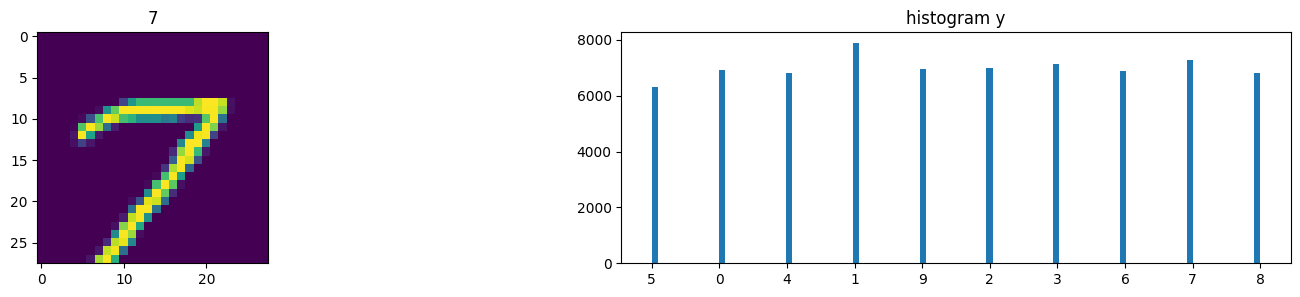

In [ ]:
X,y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

print("shape_ X:",X.shape)
print("shape_y:",y.shape)
print()
print("dim_ X:",X.ndim)
print("dim_y:",y.ndim)
print()
print("y:",np.unique(y))
print("---------------------")

fig=plt.figure(figsize=(19,3))

ax1=fig.add_subplot(1,2,1)
ax1.imshow(X[66666].reshape(28,28))
plt.title(y[66666])

ax2=fig.add_subplot(1,2,2)
ax2.hist(y,bins=100)
plt.title("histogram y")
plt.show()

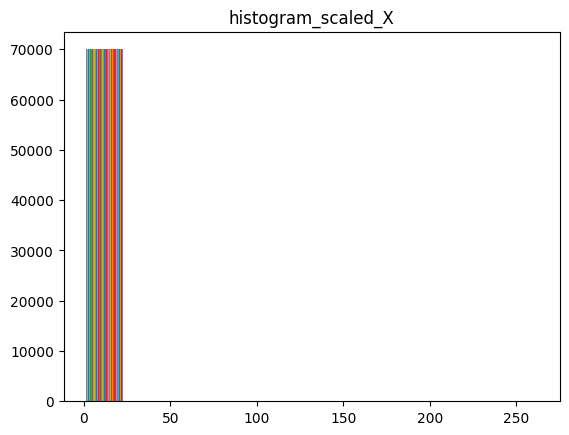

In [ ]:
# scaler=StandardScaler()
# scaled_X=scaler.fit_transform(X)

# plt.hist(scaled_X)
# plt.title("histogram_scaled_X")
# plt.show()


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42,stratify=y)

params={

        "C":[1],
        # "solver":["lbfgs","sag","saga","newton-cg"]
        "solver":["lbfgs","sag"]
}

In [ ]:
logistic_regression_model=LogisticRegression(n_jobs=-1,max_iter=110)
model=GridSearchCV(logistic_regression_model,verbose=2,scoring="accuracy",param_grid=params,cv=5)

model.fit(X_train,y_train)

print(model.best_params_)
print(model.best_score_)
print(model.best_estimator_)
best_model=model.best_estimator_ #-->LogisticRegression(C=1, max_iter=110, n_jobs=-1, solver='sag')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ..................................C=1, solver=lbfgs; total time=  28.6s
[CV] END ..................................C=1, solver=lbfgs; total time=  28.1s
[CV] END ..................................C=1, solver=lbfgs; total time=  29.9s
[CV] END ..................................C=1, solver=lbfgs; total time=  28.1s
[CV] END ..................................C=1, solver=lbfgs; total time=  27.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................C=1, solver=sag; total time= 3.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................C=1, solver=sag; total time= 3.9min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................C=1, solver=sag; total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................C=1, solver=sag; total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................C=1, solver=sag; total time= 3.8min
{'C': 1, 'solver': 'lbfgs'}
0.9183361344537815
LogisticRegression(C=1, max_iter=110, n_jobs=-1)


In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1035
           1       0.95      0.97      0.96      1182
           2       0.93      0.90      0.91      1048
           3       0.89      0.88      0.89      1071
           4       0.93      0.92      0.92      1024
           5       0.89      0.86      0.88       947
           6       0.93      0.96      0.95      1031
           7       0.94      0.94      0.94      1094
           8       0.89      0.88      0.88      1024
           9       0.89      0.91      0.90      1044

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



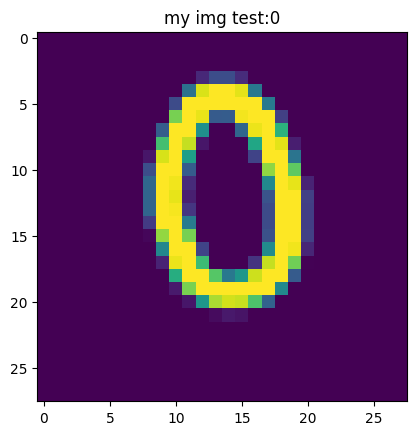

perdict: ['0']
-------------------------------------------


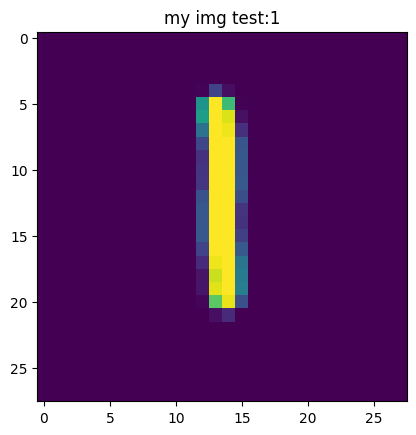

perdict: ['1']
-------------------------------------------


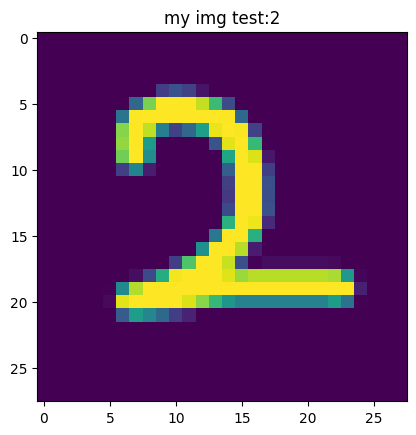

perdict: ['2']
-------------------------------------------


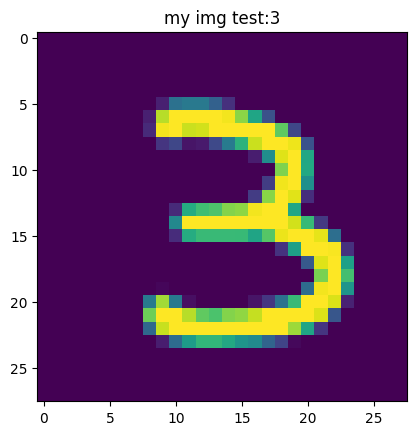

perdict: ['3']
-------------------------------------------


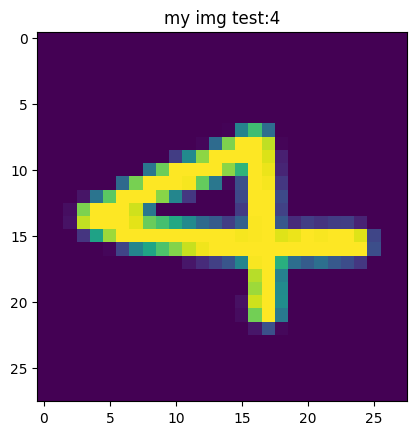

perdict: ['4']
-------------------------------------------


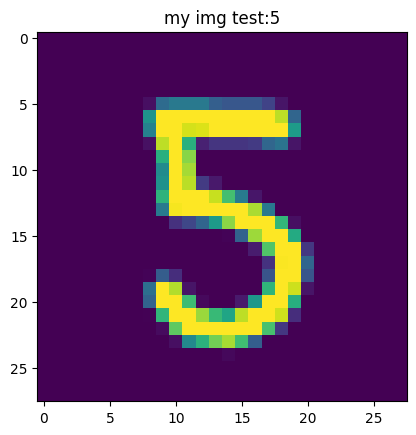

perdict: ['5']
-------------------------------------------


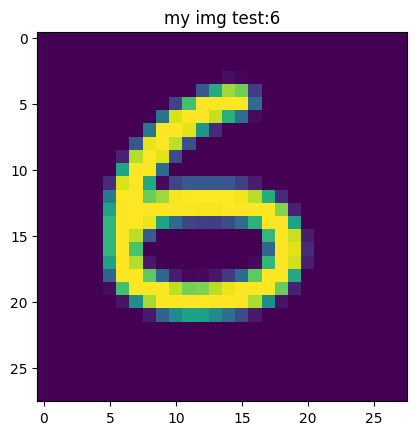

perdict: ['6']
-------------------------------------------


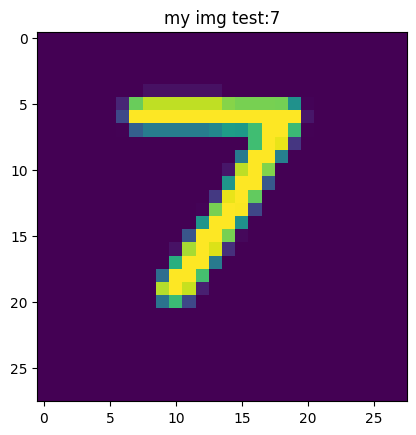

perdict: ['7']
-------------------------------------------


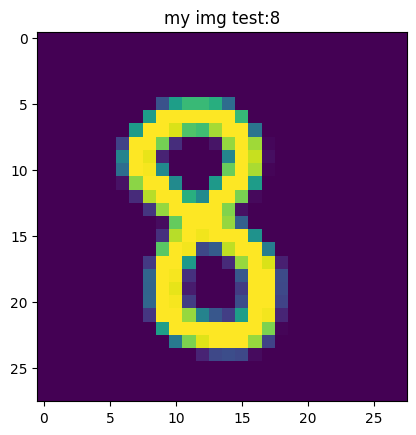

perdict: ['8']
-------------------------------------------


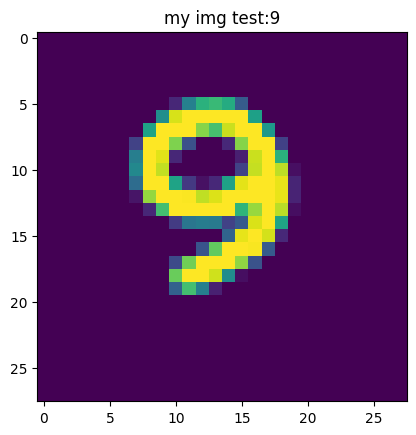

perdict: ['9']
-------------------------------------------


In [ ]:
for i in range(0,10):
    img=plt.imread(f"{i}"+".png")[:,:,0]
    # print(img.shape)
    # print(img)

    img_test=np.ravel(img)
    # print(img_test)

    plt.imshow(img)
    plt.title(f"my img test:{i}")
    plt.show()

    print("perdict:",best_model.predict([img_test]))
    print("-------------------------------------------")